<b>
<p>
<center>
<font size="5">
Machine Learning I: Mushroom Classification
</font>
</center>
</p>

<p>
<center>
<font size="4">
Final Project
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
April 25th
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Group 10
</font>
</center>
</p>
</b>

<p>
<center>
<font size="3">
Aihan Liu, Julia Jin and Sara Sanchez
</font>
</center>
</p>
</b>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Generating-the-Submission-File" data-toc-modified-id="Generating-the-Submission-File-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Generating the Submission File</a></span><ul class="toc-item"><li><span><a href="#Creating-the-directory-for-the-submission-file" data-toc-modified-id="Creating-the-directory-for-the-submission-file-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Creating the directory for the submission file</a></span></li><li><span><a href="#Generating-the-submission-file" data-toc-modified-id="Generating-the-submission-file-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Generating the submission file</a></span></li></ul></li></ul></div>

## 1. Overview

The main goal of this project is to predict if a mushroom is edible or not based on its characteristics like the cap shape, odor, gill attachment, stalk shape, etc. 

For this purpose, we will take a Mushroom Dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/mushroom) that has 8,124 instances and 22 features.

In [ ]:
## Importing Necessary Modules
import requests # to get image from the web
import shutil # to save it locally

## Set up the image URL and filename
image_url = "https://cdn.vectorstock.com/i/1000x1000/15/92/diagram-showing-parts-of-mushroom-whole-plant-vector-19731592.webp"
filename = image_url.split("/")[-1]

# Open the url image, set stream to True, this will return the stream content.
r = requests.get(image_url, stream = True)

# Check if the image was retrieved successfully
if r.status_code == 200:
    # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
    r.raw.decode_content = True
    
    # Open a local file with wb ( write binary ) permission.
    with open(filename,'wb') as f:
        shutil.copyfileobj(r.raw, f)
        
    print('Image sucessfully Downloaded: ',filename)
else:
    print('Image Couldn\'t be retreived')

Image sucessfully Downloaded:  diagram-showing-parts-of-mushroom-whole-plant-vector-19731592.webp


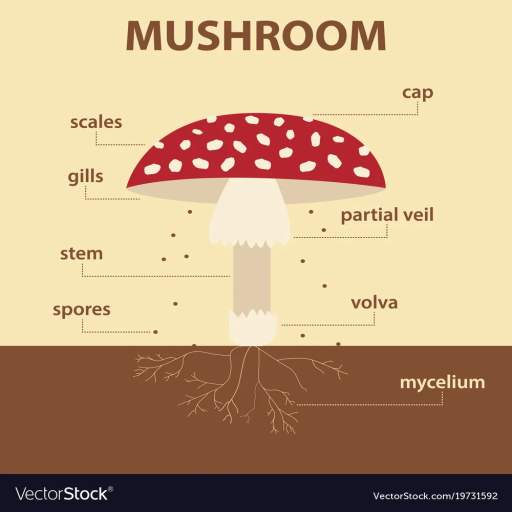

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('diagram-showing-parts-of-mushroom-whole-plant-vector-19731592.webp')
resized = cv2.resize(img, (512, 512), interpolation = cv2.INTER_AREA)
# crop_img = img[y:y+h, x:x+w]
cv2_imshow(resized)

## Labels per Feature

```

Feature            | Label 
-------------------|------------------
cap-shape          | bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
cap-surface        | fibrous=f,grooves=g,scaly=y,smooth=s
cap-color          | brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
bruises?           | bruises=t,no=f
odor               | almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
gill-attachment    | attached=a,descending=d,free=f,notched=n
gill-spacing       | close=c,crowded=w,distant=d
gill-size          | broad=b,narrow=n
gill-color         | black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
stalk-shape        | enlarging=e,tapering=t
stalk-root         | bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
stalk-surface-above-ring       | fibrous=f,scaly=y,silky=k,smooth=s
stalk-surface-below-ring       | fibrous=f,scaly=y,silky=k,smooth=s
stalk-color-above-ring      | brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
stalk-color-below-ring       | brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
veil-type       | partial=p,universal=u
veil-color       | brown=n,orange=o,white=w,yellow=y
ring-number       | none=n,one=o,two=t
ring-type       | cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
spore-print-color       | black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
population       | abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
habitat       | grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
---

cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s.

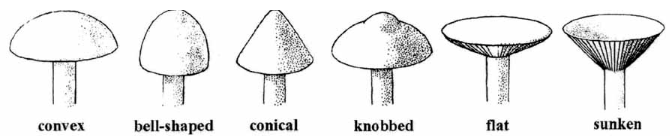

cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s.

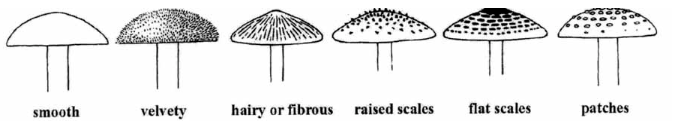

gill-attachment: attached=a, descending=d, free=f, notched=n.

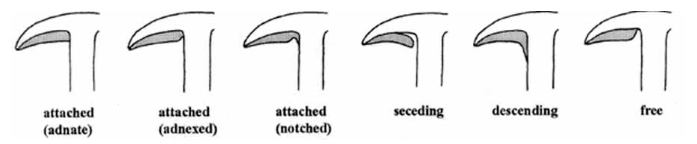

gill-spacing: close=c, crowded=w, distant=d.

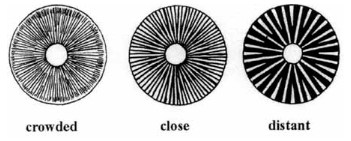

stalk-root

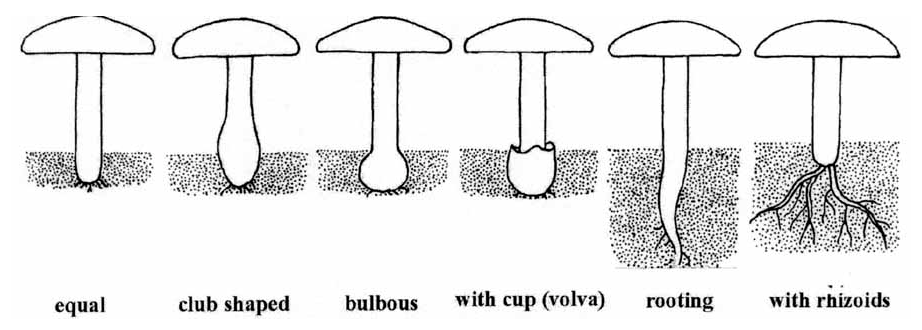

ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z.

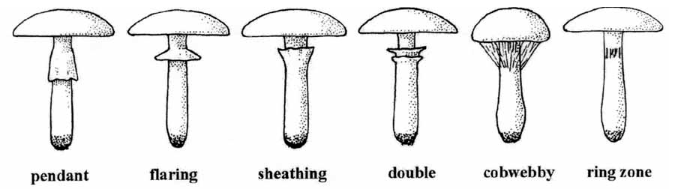

To develop this project, we will implement different machine learning models using sklearn. The goal is to train the model into the data to achieve the best accuracy. 

We will have a train, validation, test set, and X (predictor features) and y(target vector).


The models to be used will be:

**1. Logistic Regression:** Mainly used for binary classification, this will help predict the probability of a mushroom being edible or poisonous. 

**2. Random Forest:** This is an ensemble of multiple decision trees that can also give us a value of the feature importance. 

**3. Gradient Boosting:** It is a robust machine learning algorithm made up of Gradient descent and Boosting. 

**4. MLP:** A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN).

**Analysis and EDA**

The dataset consist of 8123 rows (mushrooms) and 22 columns (features of each mushroom). 

From this analysis we found that there are 2840 missing valuess on the fature stalk-root. As this represent a significative number we cannot delete this values, so we input the most common value of the category to fill the missing. 

The feature veil-type has only one category, so we are going to drop it because this does not add value since this cannot distinguish between been edible ot not. 


## 2. Notebook Configuration




## 2.1. Google drive

In [ ]:
from google.colab import drive
import sys
import os
# Mount Google Drive
drive.mount('/content/drive')

PATH = '/content/drive/My Drive/Colab Notebooks/'
print(PATH)

# Get the absolute path of the current folder
# abspath_curr = '/content/drive/My Drive/Colab Notebooks/'
abspath_curr = PATH + 'ML1_Final_Project/'

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = PATH + 'ML1_Final_Project/'
# abspath_util_shallow = '/content/drive/My Drive/Colab Notebooks/'

# Get the absolute path of the shallow models folder
abspath_model_shallow = PATH + 'ML1_Final_Project/'
# abspath_model_shallow = '/content/drive/My Drive/Colab Notebooks/'

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/


In [ ]:
abspath_util_shallow

'/content/drive/My Drive/Colab Notebooks/ML1_Final_Project/'

## 2.2. Warning

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## 2.3. Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## 2.4. TensorFlow

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

## 2.5. Random seed

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

In [ ]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore") 

## 3. Data Preprocesing

In [ ]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

/content/drive/My Drive/Colab Notebooks/ML1_Final_Project


**Loading the Data**

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data")

In [ ]:
print( df.head() )
print( df.shape )

   p  x  s  n  t p.1  f  c n.1  k  ... s.2  w w.1 p.2 w.2  o p.3 k.1 s.3  u
0  e  x  s  y  t   a  f  c   b  k  ...   s  w   w   p   w  o   p   n   n  g
1  e  b  s  w  t   l  f  c   b  n  ...   s  w   w   p   w  o   p   n   n  m
2  p  x  y  w  t   p  f  c   n  n  ...   s  w   w   p   w  o   p   k   s  u
3  e  x  s  g  f   n  f  w   b  k  ...   s  w   w   p   w  o   e   n   a  g
4  e  x  y  y  t   a  f  c   b  n  ...   s  w   w   p   w  o   p   k   n  g

[5 rows x 23 columns]
(8123, 23)


The dataset contains 8123 observations and 23 columns. The column names are not easy to read, so we changed the name of features below.

**Set the columns names**

In [ ]:
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
df.columns = columns

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


###Removing "veil-type" Variable due to contain the same value

In [ ]:
df['veil-type'].value_counts()

p    8123
Name: veil-type, dtype: int64

The veil-type has only one label, so this is not a good predictor and will not be considered in the analysis.

In [ ]:
# removing "veil-type"
df.drop(columns='veil-type',axis=1,inplace=True)

## Handling uncommon features

### Splitting the data
The student split data into training (60%), validation (20%) and test (20%).

In [ ]:
from sklearn.model_selection import train_test_split
target = 'class'
# Divide the data into training (60%) and test (40%)
df_train, df_test = train_test_split(df, 
                                     train_size=0.6, 
                                     random_state=random_seed, 
                                     stratify=df[target])

# Divide the test data into validation (50%) and test (50%)
df_val, df_test = train_test_split(df_test, 
                                   train_size=0.5, 
                                   random_state=random_seed, 
                                   stratify=df_test[target])

# Reset the index
df_train, df_val, df_test = df_train.reset_index(drop=True), df_val.reset_index(drop=True), df_test.reset_index(drop=True)

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,4873,22


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1625,22


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1625,22


In [ ]:
# Call common_var_checker
# See the implementation in pmlm_utilities.ipynb
df_common_var = common_var_checker(df_train, df_val, df_test, target)

# Print df_common_var
df_common_var

,common var
0,bruises
1,cap-color
2,cap-shape
3,cap-surface
4,class
5,gill-attachment
6,gill-color
7,gill-size
8,gill-spacing
9,habitat


In [ ]:
# Get the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Get the features in the validation data but not in the training or test data
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Get the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature


There is no uncommon feature.

## Missing data

In [ ]:
df["stalk-root"].value_counts()

b    3776
?    2480
e    1119
c     556
r     192
Name: stalk-root, dtype: int64

The stalk_root has a missing value that wrote as '?'. We replace the '?' label with missing value and fill them with the most frequent category of this column.

In [ ]:
# Replace the "?" label with NaN
df = df.replace('?', np.NaN)
# cheking the numer of missing values
print('The variable with missing values is stalk-root')
df.isna().sum()

The variable with missing values is stalk-root


class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [ ]:
# Fill in the NaN with the most frequent category of the column
df = df.fillna(df['stalk-root'].mode().iloc[0])

df["stalk-root"].value_counts()

b    6256
e    1119
c     556
r     192
Name: stalk-root, dtype: int64

## Dataset Overview

Below result shows the number of unique labels by category (levels in each variable). Variables in the Mushroom dataset are all categorical with 2-12 different levels.

In [ ]:
print("Number of unique labels by category: \n")
print(df.nunique().sort_values(ascending=False))

Number of unique labels by category: 

gill-color                  12
cap-color                   10
spore-print-color            9
odor                         9
stalk-color-below-ring       9
stalk-color-above-ring       9
habitat                      7
population                   6
cap-shape                    6
ring-type                    5
stalk-surface-below-ring     4
veil-color                   4
stalk-root                   4
stalk-surface-above-ring     4
cap-surface                  4
ring-number                  3
stalk-shape                  2
gill-size                    2
gill-spacing                 2
gill-attachment              2
bruises                      2
class                        2
dtype: int64


### Identifing target Column and show it

In [ ]:
# identifing target column name 
target = 'class'

The class level has two values: edible (e) and poisoned (p). There are 4208 mushrooms are edible and 3905 are poisoned. They each acount for around 50% of the total. The dataset is relatively balanced.

In [ ]:
# target variable

print( '='* 10, "Value count per class:", '='* 10,)
print( df[target].value_counts() )
print(' ')
print( '='* 10, "Percentage per class:", '='* 10,)
print( df[target].value_counts(normalize=True)*100 )

#  class_counts.index = ["e", "p"]
# print("Percentage per class:")
# print(class_counts/df.shape[0] * 100)

========== Value count per class: ==========
e    4208
p    3915
Name: class, dtype: int64
 
========== Percentage per class: ==========
e    51.803521
p    48.196479
Name: class, dtype: float64


2.   ## EDA

In the Exploratory data ananlysis (EDA), the student applied eleven by two countplots to check the differences of other independent variable between Edible and Poisonous mushrooms.

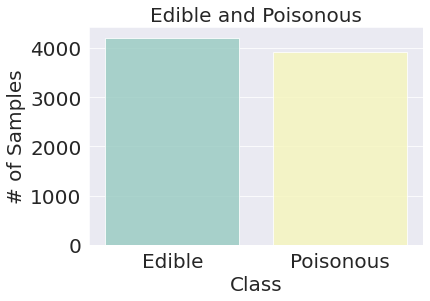

In [ ]:
#Target variable distribution
sns.set_style('darkgrid')
plt.figure()
fig1=sns.countplot(df['class'], alpha =.80, palette='Set3')
plt.title('Edible and Poisonous')
plt.ylabel('# of Samples')
plt.xlabel('Class')
fig1.set(xticklabels=['Edible','Poisonous'])
plt.show()

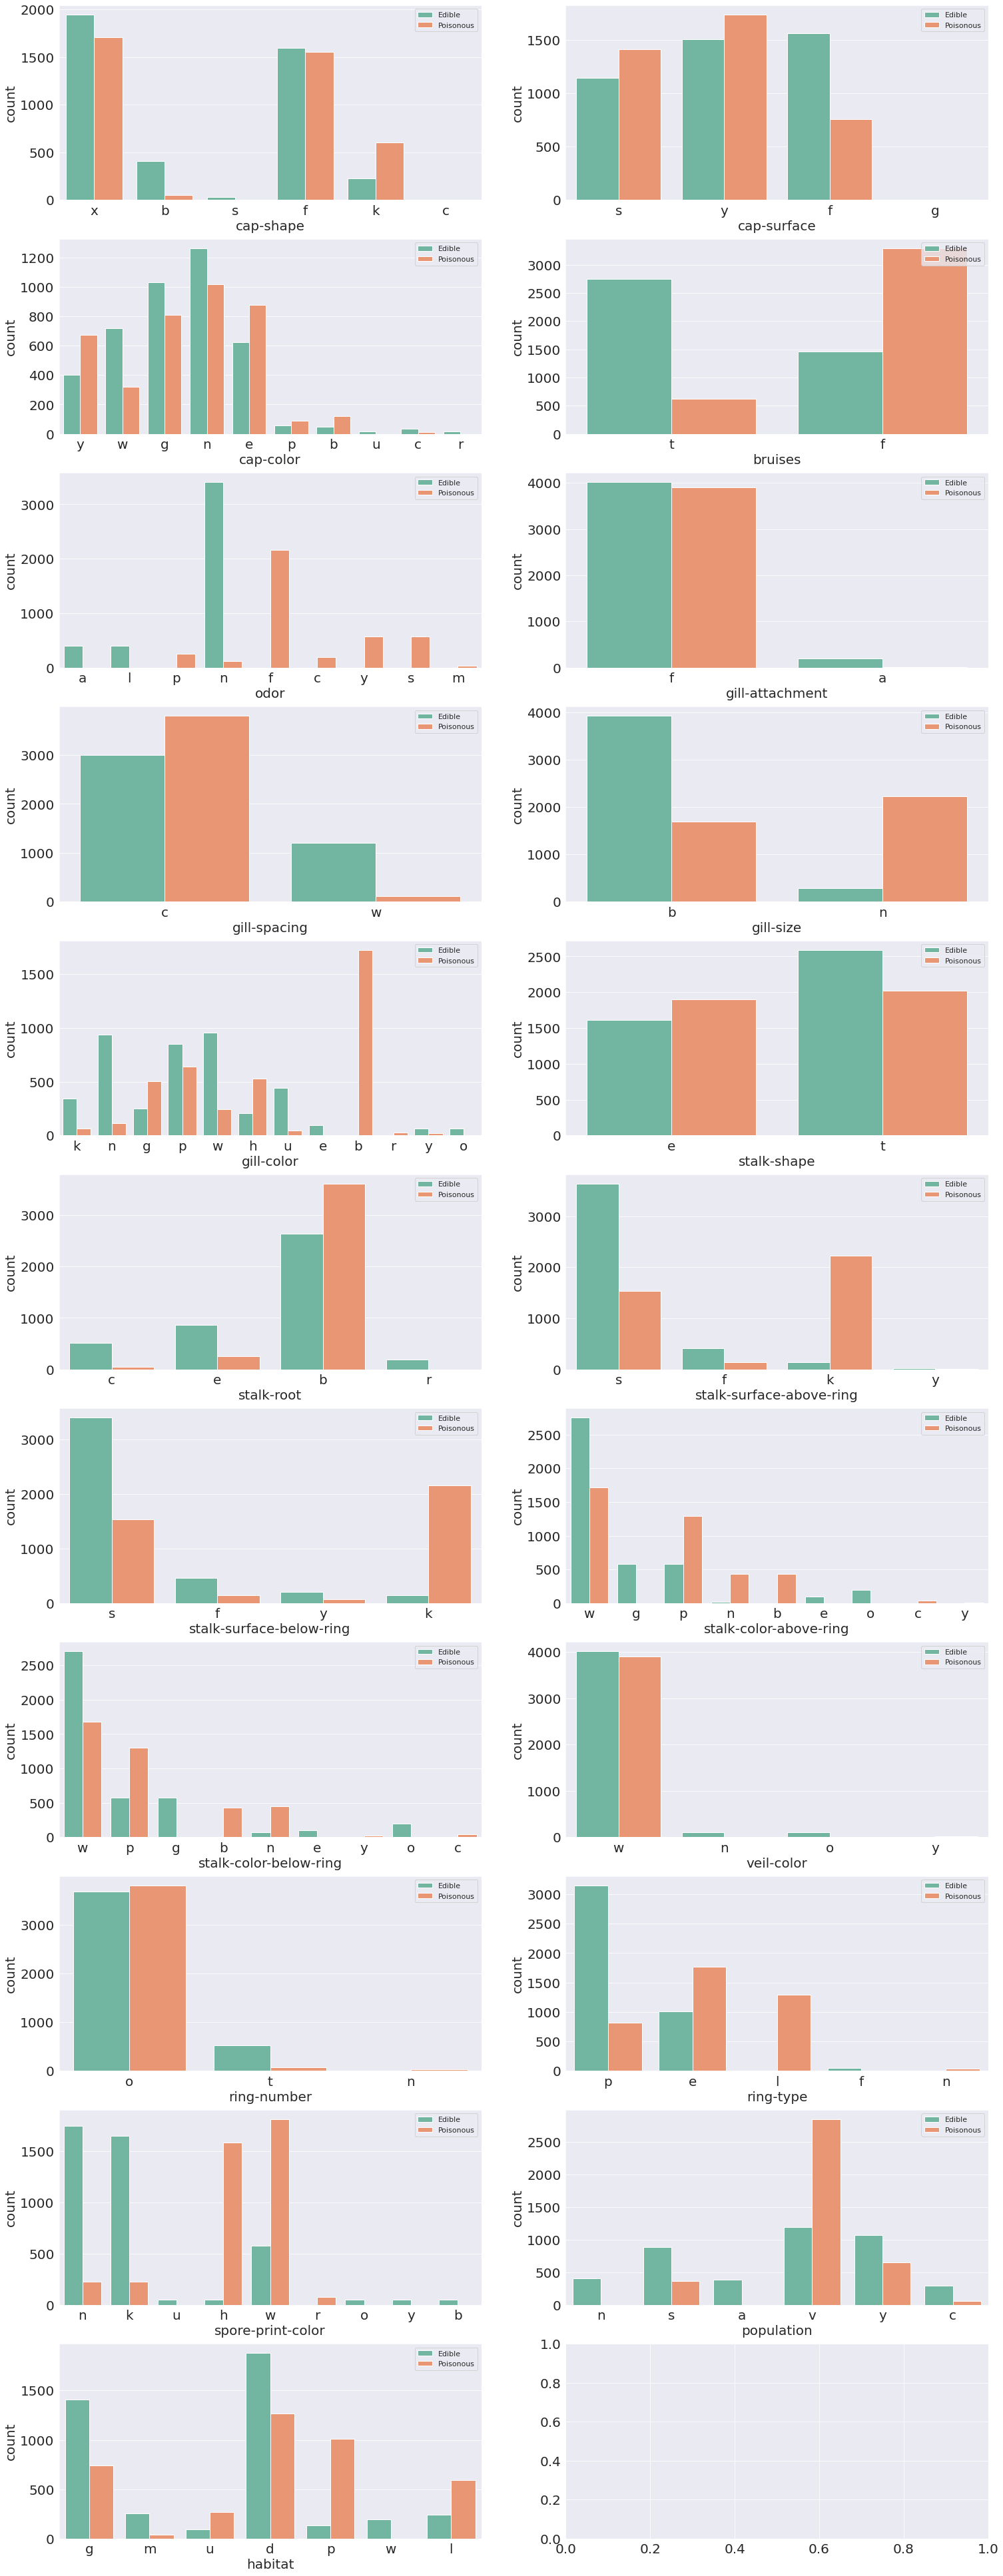

In [ ]:
#creating function to create countplots for features stacked with class
fig, axes = plt.subplots(11, 2, figsize=(25, 70))
k = 1
for i in range(0, 11):
  for j in range(0, 2):
    if k <=21:
      sns.set_style('darkgrid')
      columns_name = df.columns[k]
      sns.countplot(columns_name, ax=axes[i, j], hue=df['class'],palette='Set2',data=df)
      axes[i, j].legend(labels=['Edible','Poisonous'], loc = 1, fontsize=11)
      k += 1
    else:
      break
plt.show()

The most significant difference for the other 21 features between different kinds of mushrooms shows bruises, odor, gills, stalks, spores, and population. This result will match what we found in the modeling.

## Label Encoding

In [ ]:
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])
 
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1


## Splitting the data
The student split data into training (60%), validation (20%) and test (20%).

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the data into training (60%) and test (40%)
df_train, df_test = train_test_split(df, 
                                     train_size=0.6,
                                     random_state=random_seed, 
                                     stratify=df[target])

# Divide the test data into validation (50%) and test (50%)
df_val, df_test = train_test_split(df_test, 
                                   train_size=0.5, 
                                   random_state=random_seed, 
                                   stratify=df_test[target])

# Reset the index
df_train, df_val, df_test = df_train.reset_index(drop=True), df_val.reset_index(drop=True), df_test.reset_index(drop=True)


In [ ]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In [ ]:
print('Train data: ')
print( pd.DataFrame(y_train).value_counts(normalize=True) *100)
# print( pd.DataFrame(y_train).value_counts())
print(' ')

print('Test data: ')
print( pd.DataFrame(y_test).value_counts(normalize=True) *100)
print(' ')

print('Val data: ')
print( pd.DataFrame(y_val).value_counts(normalize=True) *100)

Train data: 
0    51.795608
1    48.204392
dtype: float64
 
Test data: 
0    51.815385
1    48.184615
dtype: float64
 
Val data: 
0    51.815385
1    48.184615
dtype: float64


## Scaling the data
### Normalization

Since we will use the machine learning models, it is necessary to normalize the data and it will give us a better result than the one doesn't have normalization.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# The MinMaxScaler
mms = MinMaxScaler()

#### Normalizing the features

In [ ]:

# Normalize the training data
X_train = mms.fit_transform(X_train)

# Normalize the validation data
X_val = mms.transform(X_val)

# Normalize the test data
X_test = mms.transform(X_test)

# Hyperparameter Tuning

In [ ]:
## Creating the dictionary of the models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
models = {'lr': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'mlpc': MLPClassifier(early_stopping=True, random_state=random_seed),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=random_seed),
          'hgbc': HistGradientBoostingClassifier(random_state=random_seed)}

## Creating the dictionary of the pipelines

In [ ]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

## Getting the predefined split cross-validator

In [ ]:
# Get the:
# feature matrix and target velctor in the combined training and validation data
# target vector in the combined training and validation data
# PredefinedSplit
# See the implementation in pmlm_utilities.ipynb
X_train_test = X_train.copy()
y_train_test = y_train.copy()

## GridSearchCV

GridSearchCV is the exhaustive search over specified parameter values for an estimator.


In [ ]:
# Creating the dictionary of the parameter grids
# key:value is model acronym:model parameter grid

param_grids = {}

#### The parameter grid for different models


The hyperparameters we want to fine tune are:
- tol
- C, the inverse of regularization strength

In [ ]:
# The parameter grid for Logistic Regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# The parameter grid of tol, the tolerance for stopping criteria; float.
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3, 10 ** -2]

# The parameter grid of C, the inverse of regularization strength; positive float
# increments of x10
C_grid = [0.001, 0.01, 0.1, 1, 10]

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]    

The hyperparameters we want to fine tune are:
- alpha, the L2 penalty (regularization term) parameter
- learning rate

In [ ]:
# The parameter grid for MLPClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

# The grids for alpha
# alpha is the L2 penalty (regularization term) parameter; float.
alpha_grids = [0.082, 0.08, 0.078]

# The grids for learning_rate_init
# learning_rate_init is the initial learning rate used, and controls the step-size in updating the weights

learning_rate_init_grids = [0.0123, 0.0122, 0.0121]

# Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]

The hyperparameters we want to fine tune are:

- min_sample_leaf, number of samples in each branch
- min_sample_split


In [ ]:
# The parameter grid for random forest aka DecisionTreeClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# The grids for min_samples_leaf
# a split point at any depth will only be considered if it leaves at least 
# min_samples_leaf training samples in each of the left and right branches
min_samples_leaf_grids = [3, 4, 5]

# The grids for min_samples_split
# the minimum number of samples required to split an internal node
min_samples_split_grids = [12, 13, 14, 15]

# min_samples_leaf guarantees a minimum number of samples in every leaf,
# no matter the value of min_samples_split

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_leaf': min_samples_leaf_grids,
                       'model__min_samples_split': min_samples_split_grids}]

The hyperparameters we want to fine-tune are:
- learning_rate
- min_samples_leaf

In [ ]:
# The parameter grid for histogram-based gradient boosting
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html

# The grids for learning_rate
# aka shrinkage, used as a multiplicative factor for the leaves values
# 1 means no shrinkage
learning_rate_grids =[0.1, 0.05, 0.02, 0.01]

# The grids for min_samples_leaf
# The minimum number of samples per leaf
min_samples_leaf_grids =[10, 20, 50, 100, 150]



# Update param_grids
param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

### Creating the directory for the cv results produced by GridSearchCV

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Tuning the hyperparameters
The code below shows how to fine-tune the hyperparametersof Logistic regression, DecisionTreeClassifier, MLPClassifier and histogram-based gradient boosting using sklearn GridSearchCV.

In [ ]:
# fine-tune the hyperparameters using sklearn GridSearchCV

from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=3,  # cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_test, y_train_test)
    
    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_curr + '/result/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
table = pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])
table.style.set_properties(subset=['best_param'], **{'width': '450px'})  #adjust column width so I can see

,best_score,best_param,best_estimator
0,1.000000,"{'model__min_samples_leaf': 3, 'model__min_samples_split': 15}","Pipeline(steps=[('model', RandomForestClassifier(class_weight='balanced', min_samples_leaf=3, min_samples_split=15, random_state=42))])"
1,1.000000,"{'model__learning_rate': 0.1, 'model__min_samples_leaf': 10}","Pipeline(steps=[('model', HistGradientBoostingClassifier(min_samples_leaf=10, random_state=42))])"
2,0.997329,"{'model__alpha': 0.08, 'model__learning_rate_init': 0.0122}","Pipeline(steps=[('model', MLPClassifier(alpha=0.08, early_stopping=True, learning_rate_init=0.0122, random_state=42))])"
3,0.957255,"{'model__C': 10, 'model__tol': 1e-05}","Pipeline(steps=[('model', LogisticRegression(C=10, class_weight='balanced', random_state=42, tol=1e-05))])"


## Getting the feature importance detected by random forest

In [ ]:
# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
# best_score_params_estimator_gs = []

In [ ]:
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_gs[0]  
# feature importance is only for random forest and this has the orden 0 from the best models, that is why best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_rfc = pd.DataFrame(
                    np.hstack((np.setdiff1d(df.columns, [target]).reshape(-1, 1),
                    best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                    columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rfc = df_fi_rfc.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_rfc.head()

,Features,Importance
0,odor,0.179874
1,gill-size,0.114959
2,gill-color,0.109597
3,ring-type,0.079927
4,spore-print-color,0.078155


## Plotting the Feature Importance

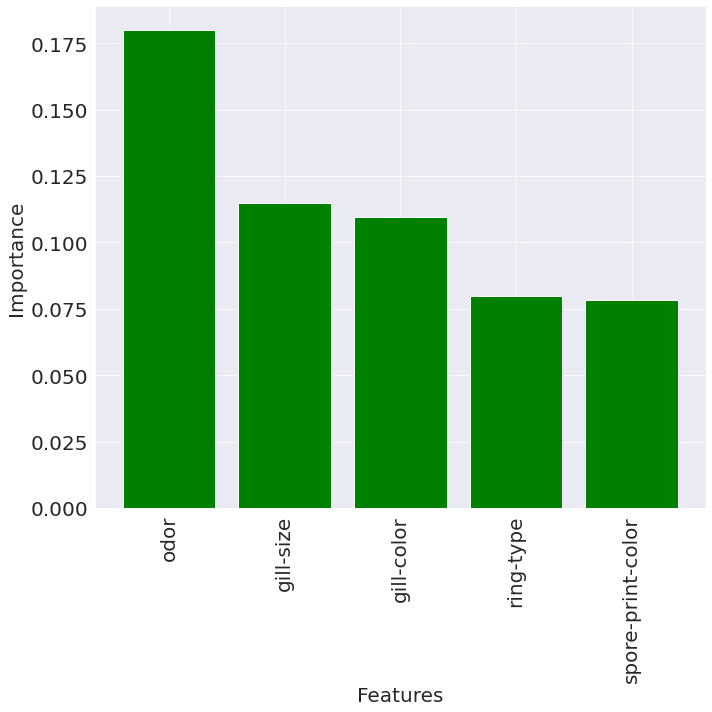

In [ ]:
# Create a figure
fig = plt.figure(figsize=(10, 10))

# The bar plot of the top 5 feature importance
plt.bar(df_fi_rfc['Features'][:5], df_fi_rfc['Importance'][:5], color='green')

# Set x-axis
plt.xlabel('Features')
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance')

# Save and show the figure
plt.tight_layout()
# plt.savefig(abspath_curr + '/result/figure/feature_importance_rfc.pdf')

The feature selection shows that the variable with the most considerable predicted value over the target is odor, followed by gill size, gill color, ring type, and spore-print color. 

# Model Selection
Here we will select RandomForest as our best model, with 1.0 of our accuracy. We choose RandomeForest over GradientBoosting, despite the same accuracy, because we are able to interpret the model in a more straight forward way. As we can see above, we can find the five features containing the most information in the RandomForest model.

In [ ]:
# Get the best_score, best_params and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
print(best_score_params_estimator_gs[0])

[1.0, {'model__min_samples_leaf': 3, 'model__min_samples_split': 15}, Pipeline(steps=[('model',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=3,
                                        min_samples_split=15,
                                        random_state=42))])]


# Citation

  

*  Barron, G. (2013). Features to ID mushrooms. [diagram]. The Atrium. http://hdl.handle.net/10214/6949
*  Diagram showing parts of mushroom whole plant vector image: https://www.vectorstock.com/royalty-free-vector/diagram-showing-parts-of-mushroom-whole-plant-vector-19731592

* Part of codes are based on the lecture case study in [/p2 c2 s5 tree_based_models/case_study](https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/spring_2022/code/p2_shallow_learning/p2_c2_supervised_learning/p2_c2_s5_tree_based_models/case_study/case_study.ipynb) provided by Prof. Yuxiao Huang, The George Washington University, Department of Data Science.